In [143]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [144]:
#load data
df = pd.read_csv('nyc_taxi_trip_duration.csv')
#see sample data
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [145]:
#seperating independent and dependent variables
df = df.drop(['pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'], axis=1)
df = df.drop('id', axis=1)
x = df.drop(['trip_duration'], axis=1)
y = df['trip_duration']
x.shape, y.shape

((729322, 6), (729322,))

In [146]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [147]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [148]:
lr = LR()
lr.fit(train_x,train_y)

LinearRegression()

In [149]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 603.0310715251692


In [150]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     596.5100587013278


In [151]:
lr.coef_

array([  202.2271497 ,    17.36343026,  2580.89854352, -3406.01426831,
        -905.39784179, -1691.77577117])

Text(0.5, 1.0, 'Coefficient plot')

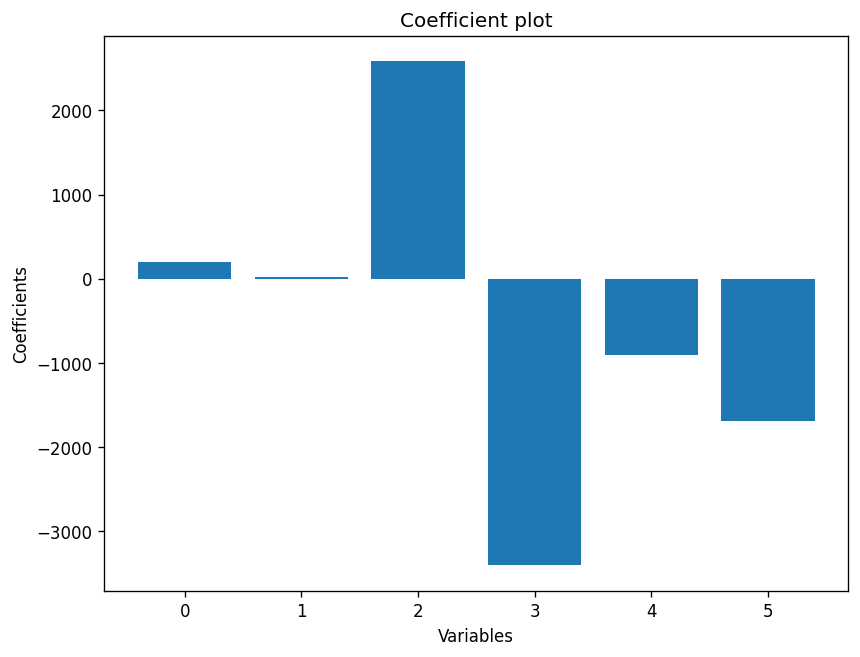

In [152]:
# see significatn coeficcants
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [153]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
14908,2406,669.758218,1736.241782
87154,1457,932.049261,524.950739
666581,163,985.216865,-822.216865
543467,2160,1162.357549,997.642451
105193,402,749.469617,-347.469617


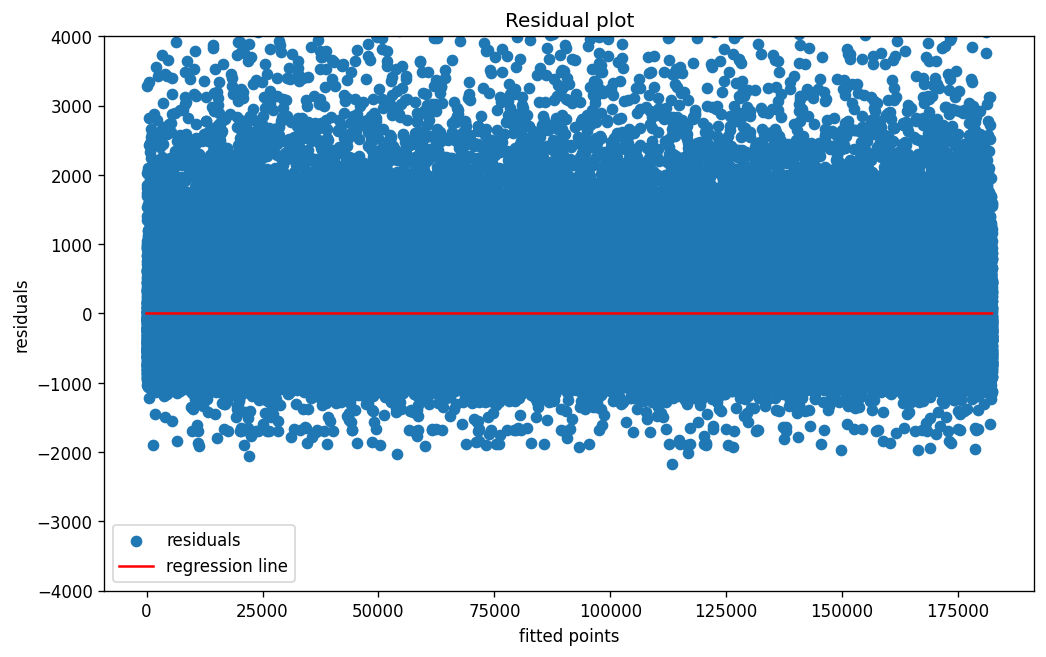

In [154]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')

# Create 'f' as a range from 0 to the number of residuals
f = np.arange(len(residuals))

# Plot the scatter plot with residuals
plt.scatter(f, residuals['residuals'], label='residuals')

# Plot the regression line (horizontal line at y=0)
plt.plot(f, np.zeros(len(residuals)), color='red', label='regression line')

plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()
plt.show()

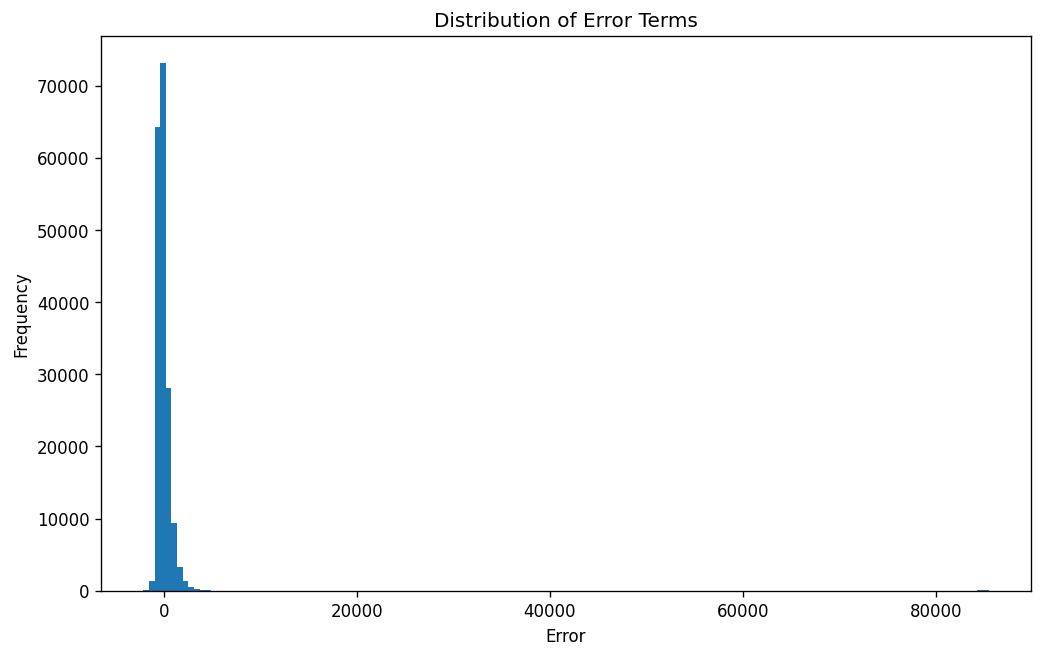

In [155]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

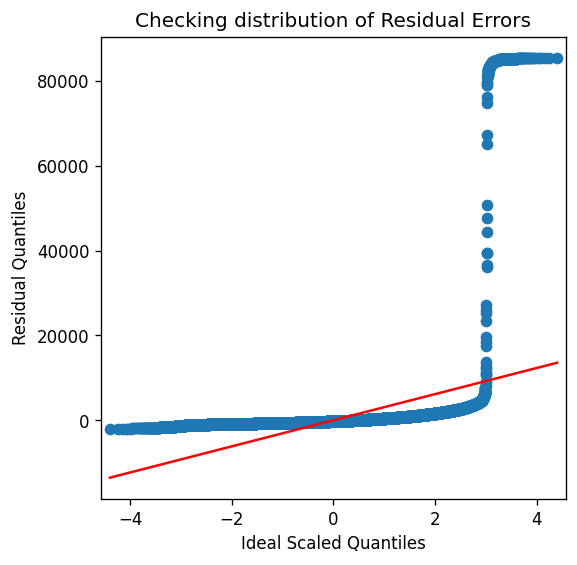

In [156]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

In [157]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index =df.columns)
VIF

vendor_id            1.142285e+01
passenger_count      2.836626e+00
pickup_longitude     2.828836e+06
pickup_latitude      1.583967e+06
dropoff_longitude    2.681241e+06
dropoff_latitude     1.405931e+06
trip_duration        1.062113e+00
dtype: float64

In [158]:
# Creating instance of Linear Regresssion
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
train_x_scaled = scaler.fit_transform(train_x)

# Transform the test data using the fitted scaler
test_x_scaled = scaler.transform(test_x)

# Create an instance of Linear Regression
lr = LinearRegression()

# Fit the model using the scaled data
lr.fit(train_x_scaled, train_y)

LinearRegression()

In [159]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 16792.102870209364


In [160]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     16782.81460844568


Text(0.5, 1.0, 'Normalized Coefficient plot')

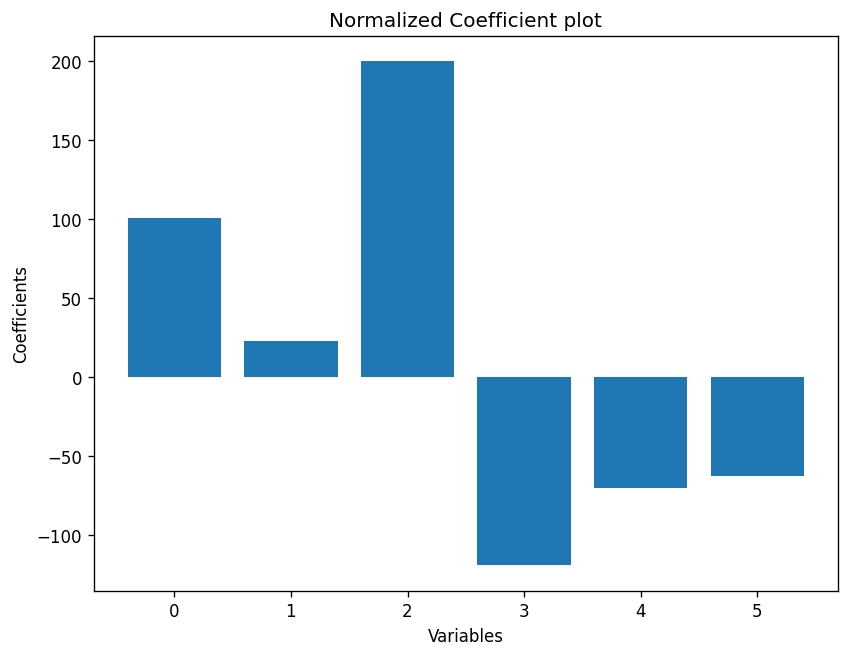

In [161]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

In [163]:
x = df.drop(['trip_duration'], axis=1)
y = df['trip_duration']
x.shape, y.shape

((729322, 6), (729322,))

In [164]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,vendor_id,100.850752
1,passenger_count,22.762032
2,pickup_longitude,199.712526
3,pickup_latitude,-119.095126
4,dropoff_longitude,-70.164567


In [165]:
sig_var = Coefficients[Coefficients.coefficient > 0.5]

In [167]:
subset = df[sig_var['Variable'].values]
subset.head()

,vendor_id,passenger_count,pickup_longitude
0,2,1,-73.953918
1,1,2,-73.988312
2,2,2,-73.997314
3,2,6,-73.961670
4,1,1,-74.017120


In [168]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

In [169]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
train_x_scaled = scaler.fit_transform(train_x)

# Transform the test data using the fitted scaler
test_x_scaled = scaler.transform(test_x)

# Create an instance of Linear Regression
lr = LinearRegression()

# Fit the model using the scaled data
lr.fit(train_x_scaled, train_y)

LinearRegression()

In [172]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )


Training Mean Absolute Error 9128.42845909337


In [173]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     9119.11503761916


Text(0.5, 1.0, 'Normalized Coefficient plot')

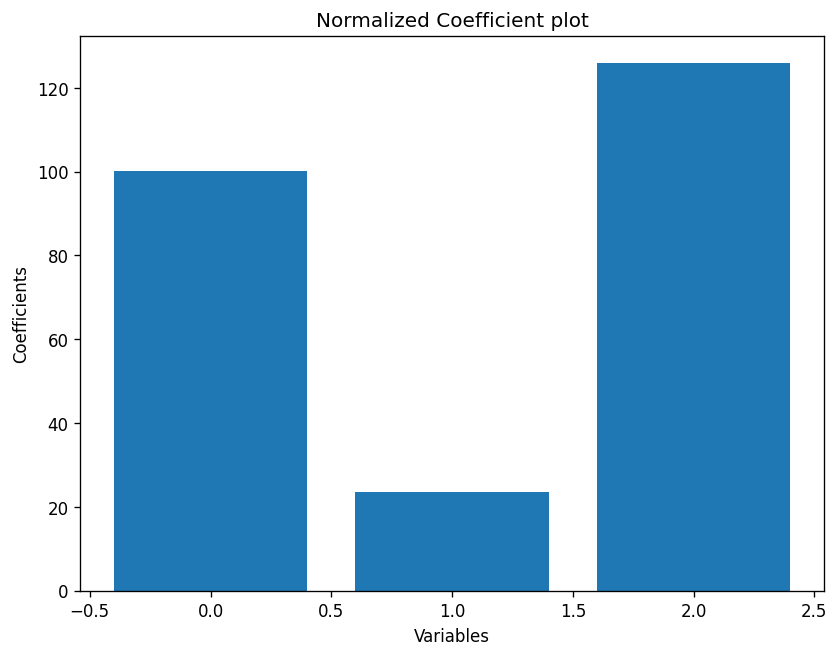

In [174]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')